# WeatherPy
----

#### Note
* Instructions have been included for each segment to think through the steps.

In [68]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [71]:
# Lists for holding lat_lngs
lat_lngs = []
# Create cities[] to hold all weather related information for found unique cities - List of Dictionaries {city:city_name,...}
cities = []
# List to add unique cities
only_cities = []

# Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_data = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city_name = city_data.city_name
      
    # If the city is unique, then add it to a the cities list
    if city_name not in only_cities:
        only_cities.append(city_name)
        country = city_data.country_code
        # Populate cities[] with dictionaries with keys needed for further analysis
        cities.append({"City":city_name, "Country":country, "Lat":"", "Lng":"", "Max Temp":"", "Humidity":"", "Cloudiness":"",
                        "Wind Speed":"", "Date":""})

# Print the city count to confirm sufficient count
print(len(cities))

589


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [73]:
# Use Open Weather API to access weather data

# Get temperature in Fahrengeit
units="imperial"

# Specify the query url
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# an example of request
# http://api.openweathermap.org/data/2.5/weather?appid=e177161205c800990b4bee8d53c03467&units=imperial&q=sitka

# Get All needed weather parameters for each city
print("Beginning Data Retrieval")
print("--------------------------------")

# Set data for loop - record counter and copy of cities list to iterate throuh
cities_copy = [city for city in cities]
record_id=0

# Iterate through cities_copy to get weather data for each city
for city in cities_copy:

    try:
        print(f"Processing Record {record_id} | {city['City']}")
        
        # Try all required responses first
        response = requests.get(url+city['City']).json()
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        temp = response["main"]["temp_max"]
        hum = response["main"]["humidity"]
        cld = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        dt = response["dt"]

        # update city with obtained weather data
        city.update({"Lat":lat, "Lng":lng, "Max Temp":temp, "Humidity":hum, "Cloudiness":cld, "Wind Speed":wind, "Date":dt})

    except:
        print(f"City {city['City']} not found. Skipping...")
            
        # Remove this city from cities list
        cities.remove(city) 

    record_id+=1
    
print("--------------------------------")        
print("Data Retrieval Complete")
print("--------------------------------")
print(len(cities))

Beginning Data Retrieval
--------------------------------
Processing Record 0 | edinburgh of the seven seas
Processing Record 1 | ribeira grande
Processing Record 2 | lycksele
Processing Record 3 | puerto baquerizo moreno
Processing Record 4 | saldanha
Processing Record 5 | labrador city
Processing Record 6 | atafu village
Processing Record 7 | waitangi
Processing Record 8 | greenville
Processing Record 9 | villa gesell
Processing Record 10 | labytnangi
Processing Record 11 | bethel
Processing Record 12 | colonia
Processing Record 13 | kodiak
Processing Record 14 | yellowknife
Processing Record 15 | hamilton
Processing Record 16 | anadyr
Processing Record 17 | taghazout
Processing Record 18 | lebu
Processing Record 19 | blackmans bay
Processing Record 20 | camana
Processing Record 21 | utrik
Processing Record 22 | bilibino
Processing Record 23 | new plymouth
Processing Record 24 | hermanus
Processing Record 25 | solnechnogorsk
Processing Record 26 | margaret river
Processing Record 27 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [75]:
# create Data Frame out of list of dictionaries 
cities_weather_df = pd.DataFrame(cities)
cities_weather_df.to_csv("Output/city_weather.csv")
cities_weather_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,edinburgh of the seven seas,sh,-37.0676,-12.3116,52.39,74,88,16.73,1725565726
1,ribeira grande,cv,38.5167,-28.7000,73.80,60,20,10.36,1725565726
2,lycksele,se,64.5954,18.6735,62.47,94,75,3.44,1725565727
3,puerto baquerizo moreno,ec,-0.9000,-89.6000,76.19,88,75,17.27,1725565727
4,saldanha,za,-33.0117,17.9442,44.65,60,3,16.93,1725565727
...,...,...,...,...,...,...,...,...,...
559,chaman,pk,30.9236,66.4512,79.66,16,0,8.46,1725565834
560,poso,id,-1.3959,120.7524,76.64,89,94,3.87,1725565592
561,las tablas,pa,7.7667,-80.2833,84.61,73,100,0.40,1725565834
562,vadso,no,70.0744,29.7487,50.16,76,0,5.75,1725565834


In [76]:
type(cities_weather_df["Date"][0])

numpy.int64

In [77]:
# improvement might be to work with date format
#cities_weather_df["Date"] = pd.to_datetime(cities_weather_df["Date"].astype(str)).values
#pd.to_datetime(arr.astype(str)).values

In [78]:
# convert to float
cities_weather_df["Humidity"] = cities_weather_df["Humidity"].astype(float)
cities_weather_df["Cloudiness"] = cities_weather_df["Cloudiness"].astype(float)
cities_weather_df["Wind Speed"] = cities_weather_df["Wind Speed"].astype(float)

# Add statistics
cities_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,19.309499,20.510545,68.835869,69.932624,53.056738,8.811011,1.725566e+09
std,32.549354,88.547362,15.101583,22.196020,40.739919,6.053187,6.951732e+01
min,-54.800000,-176.559700,28.270000,4.000000,0.000000,0.000000,1.725565e+09
25%,-8.266075,-60.788300,56.147500,59.750000,6.750000,4.447500,1.725566e+09
50%,21.906100,25.624050,71.185000,76.000000,59.000000,7.670000,1.725566e+09
75%,45.837625,93.770825,79.555000,87.000000,99.000000,11.690000,1.725566e+09
max,78.218600,179.383300,109.240000,100.000000,100.000000,37.330000,1.725566e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [80]:
hum_df = pd.DataFrame(cities_weather_df)

# If there are cities with humidity > 100 save indices
hmdt_more_thn_100 = False
indices = []
for index, row in hum_df.iterrows():
    if hum_df.loc[index,"Humidity"]>100:
        indices.append(index)
        hmdt_more_thn_100 = True
indices

[]

In [81]:
# If such cities found drop them from DataFrame
clean_df = hum_df.drop(indices, inplace = False) if hmdt_more_thn_100 else pd.DataFrame(cities_weather_df)
clean_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,edinburgh of the seven seas,sh,-37.0676,-12.3116,52.39,74.0,88.0,16.73,1725565726
1,ribeira grande,cv,38.5167,-28.7000,73.80,60.0,20.0,10.36,1725565726
2,lycksele,se,64.5954,18.6735,62.47,94.0,75.0,3.44,1725565727
3,puerto baquerizo moreno,ec,-0.9000,-89.6000,76.19,88.0,75.0,17.27,1725565727
4,saldanha,za,-33.0117,17.9442,44.65,60.0,3.0,16.93,1725565727
...,...,...,...,...,...,...,...,...,...
559,chaman,pk,30.9236,66.4512,79.66,16.0,0.0,8.46,1725565834
560,poso,id,-1.3959,120.7524,76.64,89.0,94.0,3.87,1725565592
561,las tablas,pa,7.7667,-80.2833,84.61,73.0,100.0,0.40,1725565834
562,vadso,no,70.0744,29.7487,50.16,76.0,0.0,5.75,1725565834


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [83]:
# Get the date of analysis
analysis_date = date.today()

# Define function to adjust y_labels
def label(y_label):
    switch = {
        "Max Temperature": "Max Temperature (F)",
        "Humidity": "Humidity (%)",
        "Cloudiness": "Cloudiness (%)",
        "Wind Speed": "Wind Speed (mph)"
    }
    return switch.get(y_label)

# Define function to build a scatter plot and to save to .png file
def scatter(y_value, y_label):
    ax = clean_df.plot(kind = "scatter", x = "Lat", y = y_value,
              title = f"City Latitude vs. {y_label} ({analysis_date})",
                      marker = "o", s=35, facecolor="teal", edgecolor = "black", grid = True)
    ax.set_xlabel("Latitude")
    ax.set_ylabel(label(y_label))
    
    fig = ax.get_figure()
    fig.savefig(f"Output/Lat_{y_label}.png")

## Latitude vs. Temperature Plot

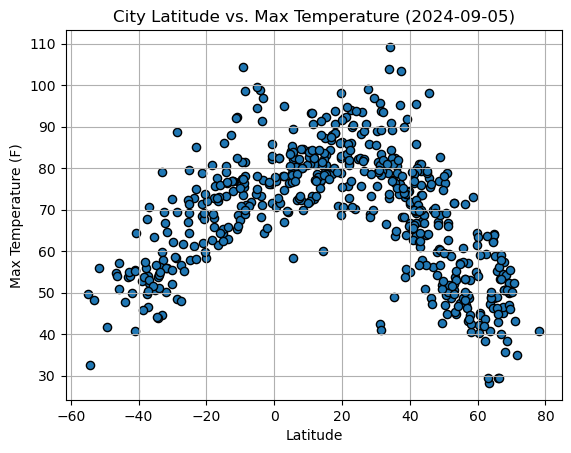

In [85]:
scatter("Max Temp", "Max Temperature")

* Latitude vs. Temperature Plot shows that there is a correlation between Latitude and Max Temperature.
* The closer the latitude to the zero the higher we might expect the Max Temperatures.
* At the current time of Analysis the Highest Temperature tend to shift towards Northern Hemisphere.

## Latitude vs. Humidity Plot

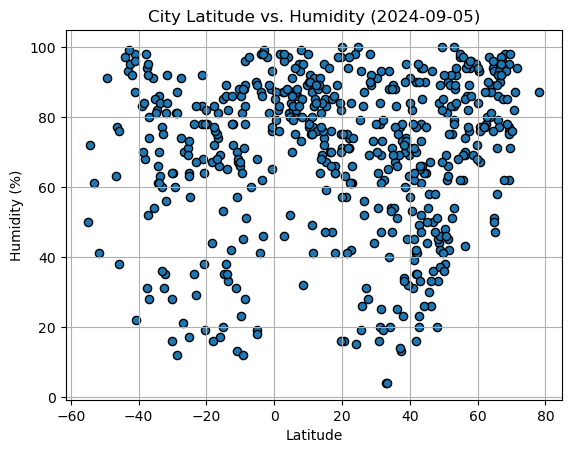

In [88]:
scatter("Humidity", "Humidity")

* Latitude vs. Humidity Plot shows that the Humidity is hardly correlated with the Latitude

## Latitude vs. Cloudiness Plot

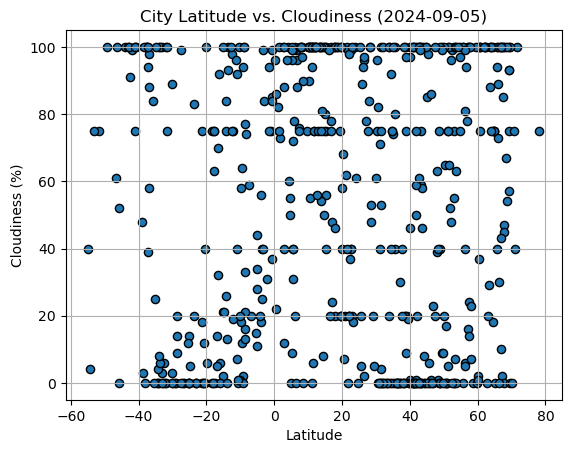

In [91]:
scatter("Cloudiness","Cloudiness")

* Latitude vs. Cloudiness Plot shows that the Cloudiness can be predicted based only on Latitude

## Latitude vs. Wind Speed Plot

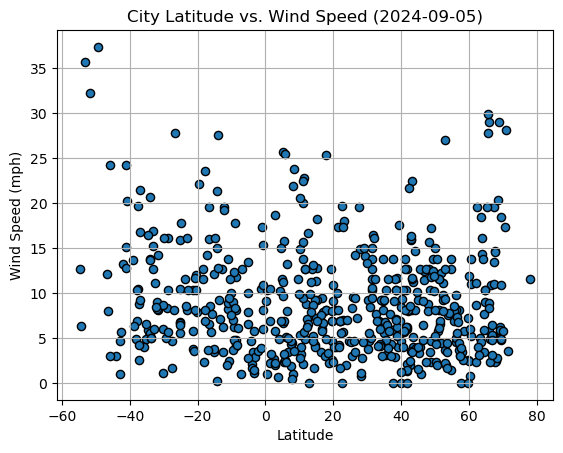

In [94]:
scatter("Wind Speed", "Wind Speed")

* Latitude vs. Wind Speed Plot shows that the Highest Wind Speed measurements slightly tends to lower towards South and North Poles
* Lower Wind Speed values density is being observed in -20:60 range of Latitude values

## Linear Regression

In [176]:
# Add function that calculates linear regreassion

# Calculate correlation usong scipy pearsonr method
def correlation(var1, var2):
    r_value = st.pearsonr(var1, var2)
    round_r_value = round(r_value[0],2)
    print(f"The r-value is {round_r_value}")
    return round_r_value
    #return r_value

# Calculate linear regression equation
def regression(var1, var2):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(var1, var2)
    regress_values = var1 * slope + intercept
    return regress_values

# Plot scatter chart and linear regreassion
def scatter_plot(title, dataFrame, x_value, y_value, regrX_values, regrY_values, x_label, y_label, r_value):
    plot = dataFrame.plot.scatter(x = x_value, y = y_value, s=40, label = "r-value is"+str(r_value))
    plot.set_title(f"Linear Regression Model ({y_label}, {x_label})\n{title}")
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    plt.plot(regrX_values,regrY_values,"r-")
    plt.show()

    fig = plot.get_figure()
    fig.savefig(f"Output/LinrRegrr_{x_label}_{y_label}_{title}.png")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.72


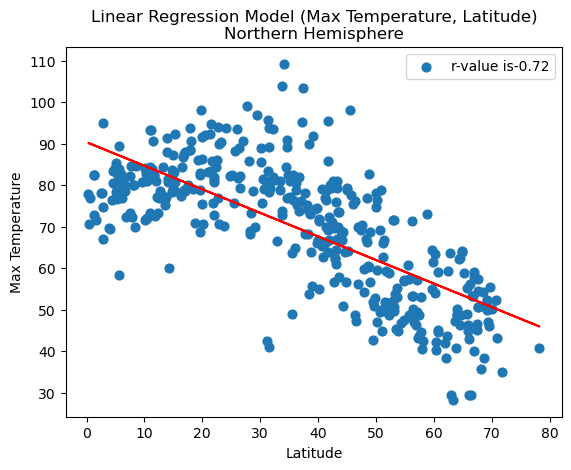

In [180]:
# Define Northern Hemisphere
north_hem = clean_df.loc[clean_df["Lat"]>=0]

north_lat = north_hem["Lat"]
north_max_temp = north_hem["Max Temp"]

r_value = correlation(north_lat, north_max_temp)

scatter_plot("Northern Hemisphere", north_hem, "Lat", "Max Temp", north_lat,
             regression(north_lat, north_max_temp), "Latitude", "Max Temperature", r_value)

In [152]:
r_value = correlation(north_lat, north_max_temp)


The r-value is -0.72


-0.72

* There is a strong negative correlation between Max Temp and Latitude in Northern Hemisphere.
* That means that the more to the North the city is the less Max Temp it gets

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.76


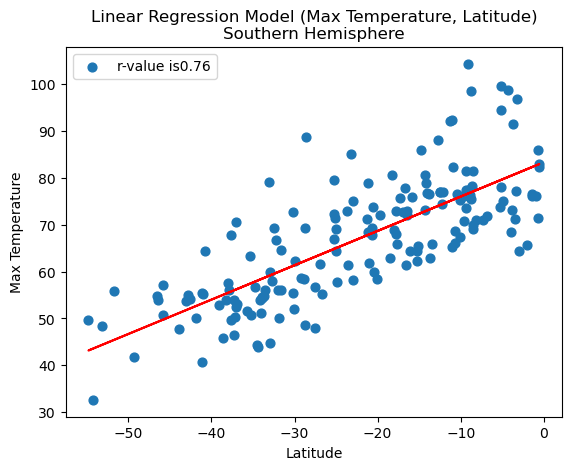

In [178]:
# Define Southern Hemisphere
south_hem = clean_df.loc[clean_df["Lat"]<=0]

south_lat = south_hem["Lat"]
south_max_temp = south_hem["Max Temp"]

r_value = correlation(south_lat, south_max_temp)

scatter_plot("Southern Hemisphere", south_hem, "Lat", "Max Temp", south_lat,
             regression(south_lat, south_max_temp), "Latitude", "Max Temperature", r_value)

* There is a strong positive correlation between Max Temp and Latitude in Southern Hemisphere.
* This means that the closer the city is to the Equator the greater Max Temp it gets.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.0


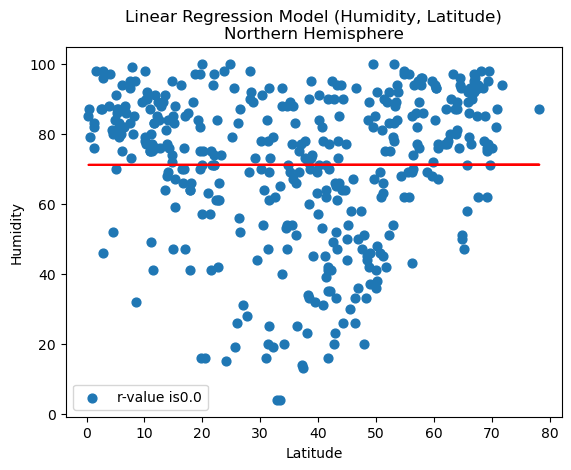

In [182]:
north_humidity = north_hem["Humidity"]

r_value = correlation(north_lat, north_humidity)

scatter_plot("Northern Hemisphere", north_hem, "Lat", "Humidity", north_lat,
             regression(north_lat, north_humidity), "Latitude", "Humidity", r_value)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.03


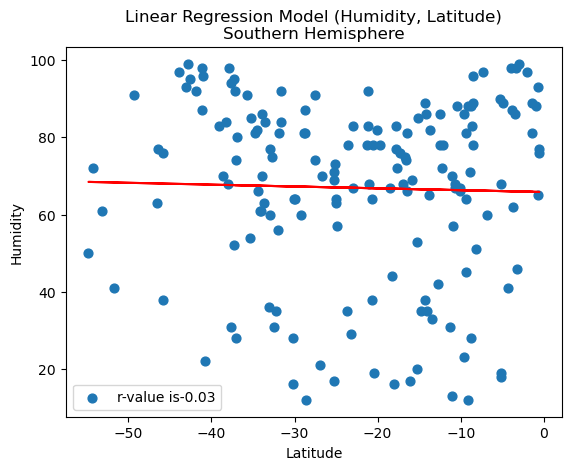

In [184]:
south_humidity = south_hem["Humidity"]

r_value = correlation(south_lat, south_humidity)

scatter_plot("Southern Hemisphere", south_hem, "Lat", "Humidity", south_lat,
             regression(south_lat, south_humidity), "Latitude", "Humidity", r_value)

* Linear Regression Model for Humidity vs Latitude for both Henispheres shows that there is almost no correlation (close to zero) between these two parameters
* Humidity levels can not be predicted by knowing latitudes of cities

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.13


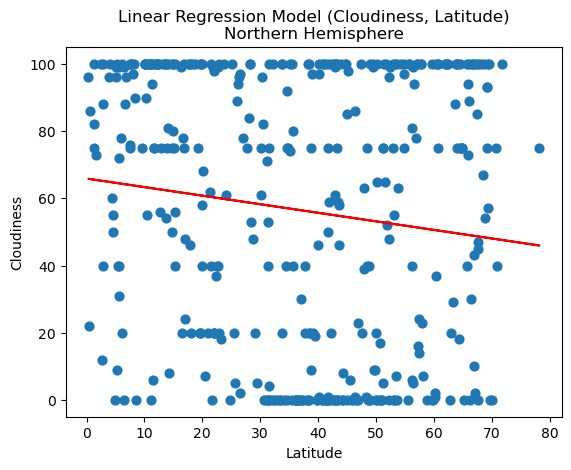

In [110]:
north_cloud = north_hem["Cloudiness"]

r_value = correlation(north_lat, north_cloud)

scatter_plot("Northern Hemisphere", north_hem, "Lat", "Cloudiness", north_lat,
             regression(north_lat, north_cloud), "Latitude", "Cloudiness", r_value)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.09


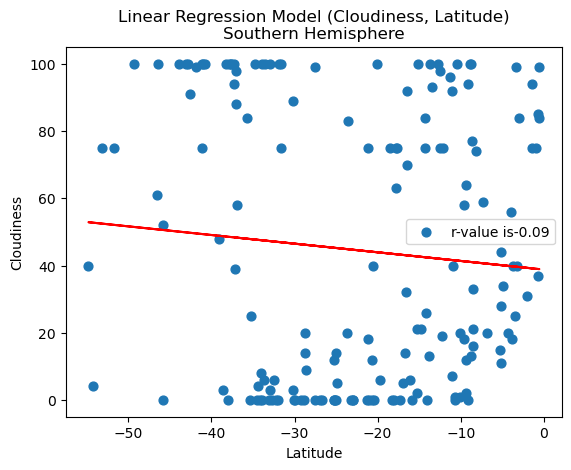

In [186]:
south_cloud = south_hem["Cloudiness"]

r_value = correlation(south_lat, south_cloud)

scatter_plot("Southern Hemisphere", south_hem, "Lat", "Cloudiness", south_lat,
             regression(south_lat, south_cloud), "Latitude", "Cloudiness", r_value)

* Linear Regreassion model does not explain the relationship between Cloudiness and Latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.05


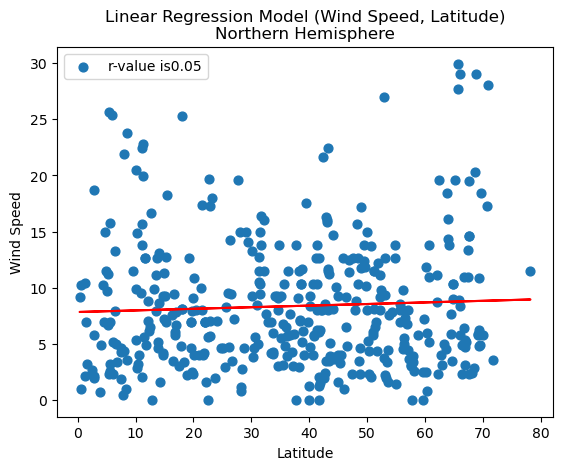

In [188]:
north_wind = north_hem["Wind Speed"]

r_value = correlation(north_lat, north_wind)

scatter_plot("Northern Hemisphere", north_hem, "Lat", "Wind Speed", north_lat,
             regression(north_lat, north_wind), "Latitude", "Wind Speed", r_value)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.28


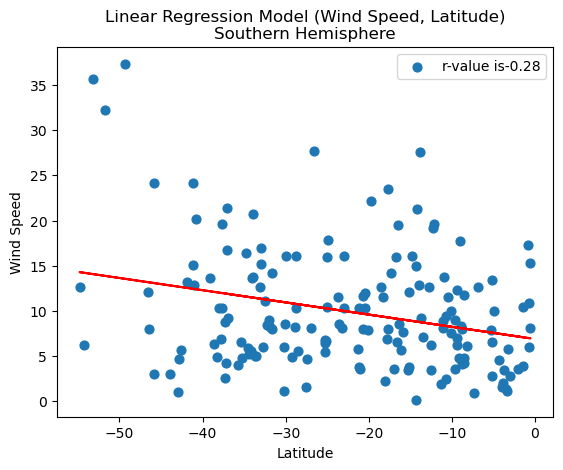

In [190]:
south_wind = south_hem["Wind Speed"]

r_value = correlation(south_lat, south_wind)

scatter_plot("Southern Hemisphere", south_hem, "Lat", "Wind Speed", south_lat,
             regression(south_lat, south_wind), "Latitude", "Wind Speed", r_value)

* There is some dependency between Wind Speed and Latitude, but it is week to say that there is a reliable correlation
* For Southern Hemisphere the r-value is slighlty more significant (-0.14) than for Northern (-0.03), and can maybe explain the density of lower wind speed values near Equator